Task No.- 2
Name - Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input\Diabetes Prediction\diabetes.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
df = pd.read_csv("/kaggle/input\Diabetes Prediction\diabetes.csv")

In [6]:
print(df.shape)

(768, 9)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df = df.rename(columns=lambda x: x.lower())

In [10]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [11]:
df.isnull().mean()

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

In [12]:
df.nunique()

pregnancies                  17
glucose                     136
bloodpressure                47
skinthickness                51
insulin                     186
bmi                         248
diabetespedigreefunction    517
age                          52
outcome                       2
dtype: int64

In [13]:
df.duplicated().any()

False

In [14]:
corr_matrix = df.corr()
corr_matrix

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

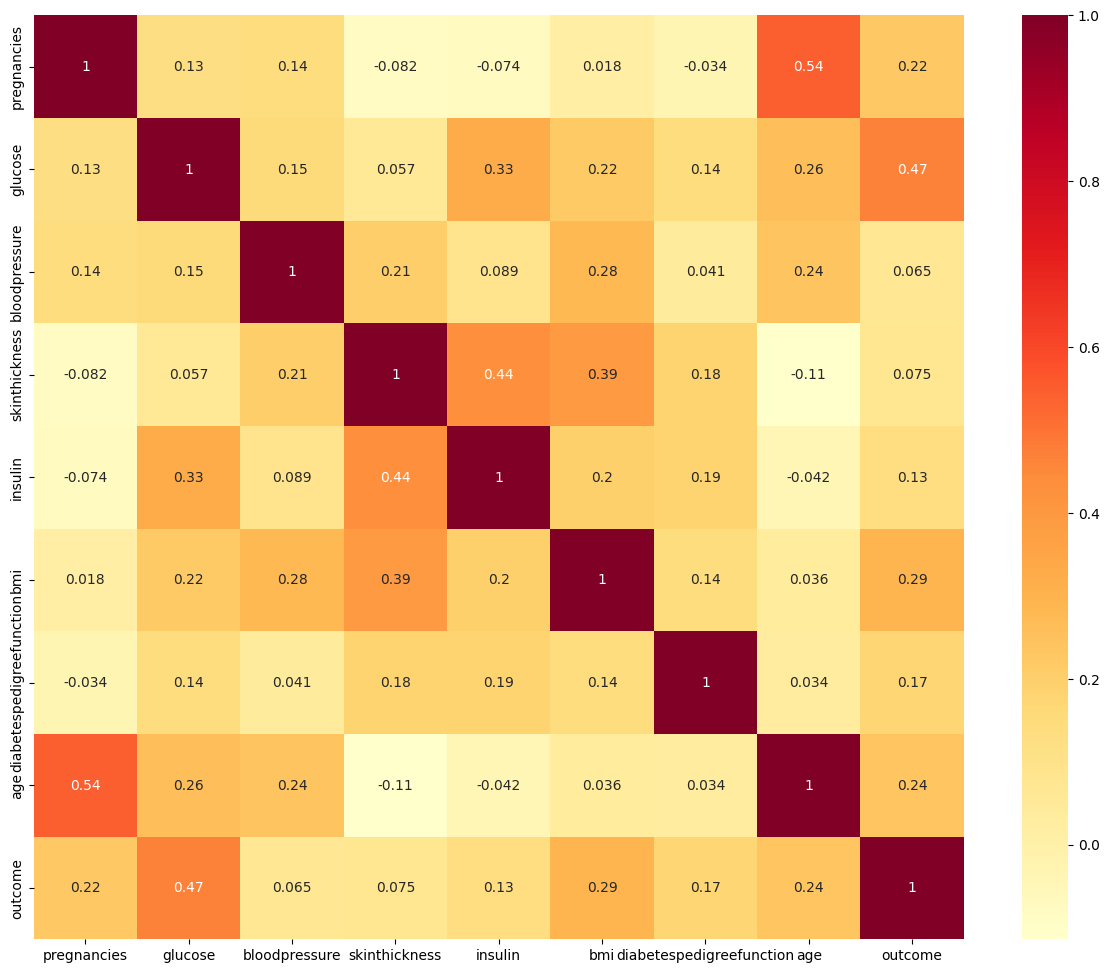

In [15]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")

In [16]:
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df[['glucose','bloodpressure','skinthickness','insulin','bmi']] = df[['glucose','bloodpressure','skinthickness','insulin','bmi']].replace(0,np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   763 non-null    float64
 2   bloodpressure             733 non-null    float64
 3   skinthickness             541 non-null    float64
 4   insulin                   394 non-null    float64
 5   bmi                       757 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

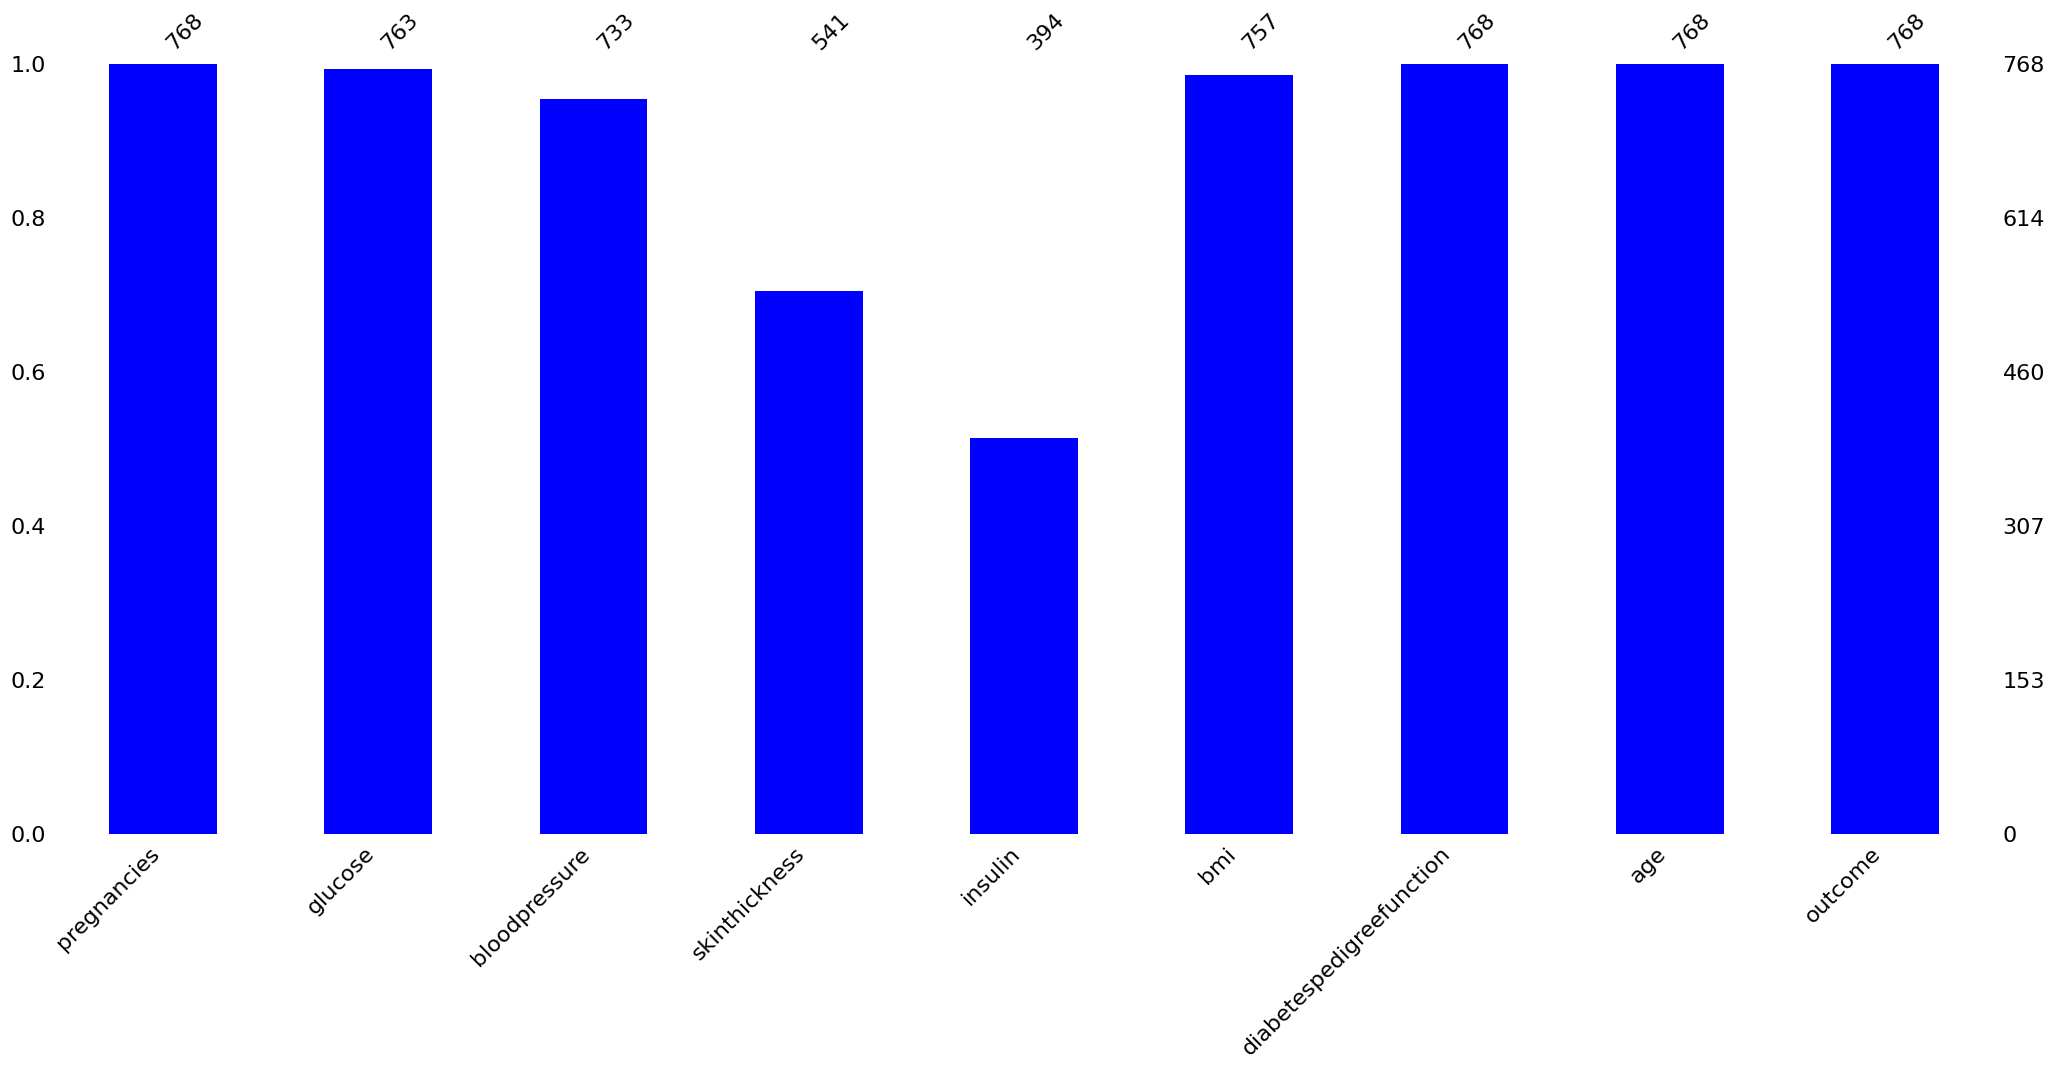

In [20]:
import missingno as msno

msno.bar(df,color="blue")

In [21]:
df_copy = df.copy()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   763 non-null    float64
 2   bloodpressure             733 non-null    float64
 3   skinthickness             541 non-null    float64
 4   insulin                   394 non-null    float64
 5   bmi                       757 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
from sklearn.impute import KNNImputer
data = df_copy.values

In [24]:
E = [i for i in range(data.shape[1]) if i != 8]
X, y = data[:, E], data[:, 8]

In [25]:
print('Missing: %d' % sum(np.isnan(X).flatten()))

Missing: 652


In [26]:
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


importing libraries

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [28]:
df_copy2 = df.copy()

data2 = df_copy2.values
B = [i for i in range(data2.shape[1]) if i != 8]
X, y = data2[:, B], data2[:, 8]

model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.757 (0.045)


>1 0.764 (0.048)
>3 0.753 (0.049)
>5 0.753 (0.049)
>7 0.759 (0.042)
>9 0.752 (0.054)
>15 0.757 (0.047)
>18 0.759 (0.053)
>21 0.756 (0.050)


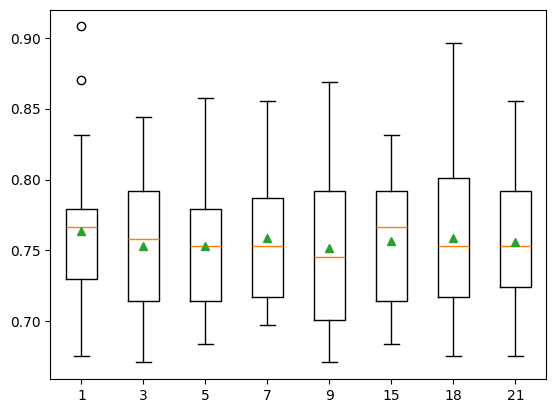

In [29]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

df3 = df.copy()

data3 = df3.values
C = [i for i in range(data3.shape[1]) if i != 8]
X, y = data3[:, C], data3[:, 8]

results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m',RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()
    

Feature 0: 21.952926
Feature 1: 134.995132
Feature 2: 1.868609
Feature 3: 2.141532
Feature 4: 6.303769
Feature 5: 41.691993
Feature 6: 11.759834
Feature 7: 26.831139


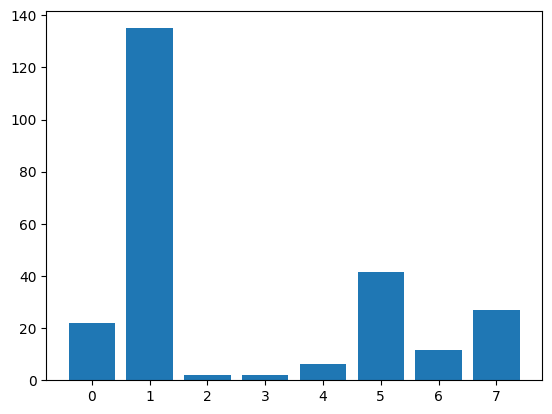

In [30]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

def load_dataset(filename):
    data = read_csv(filename, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X, y = load_dataset("/kaggle/input\Diabetes Prediction\diabetes.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [31]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_dataset(filename):
    data = read_csv(filename)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X, y = load_dataset("/kaggle/input\Diabetes Prediction\diabetes.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


In [32]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def load_dataset(filename):
    data = read_csv(filename)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

X, y = load_dataset("/kaggle/input\Diabetes Prediction\diabetes.csv")
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
results = search.fit(X, y)
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 7}


>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


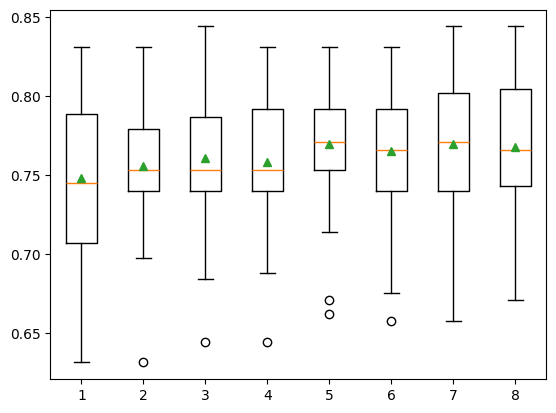

In [33]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

def load_dataset(filename):
    data = read_csv(filename)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

X, y = load_dataset("/kaggle/input\Diabetes Prediction\diabetes.csv")
num_features = [i+1 for i in range(X.shape[1])]
results = list()
for k in num_features:
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    scores = evaluate_model(pipeline)
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

>1 0.747 (0.048)
>2 0.765 (0.040)
>3 0.766 (0.042)
>4 0.765 (0.044)
>5 0.772 (0.041)
>6 0.774 (0.043)
>7 0.774 (0.043)
>8 0.772 (0.043)


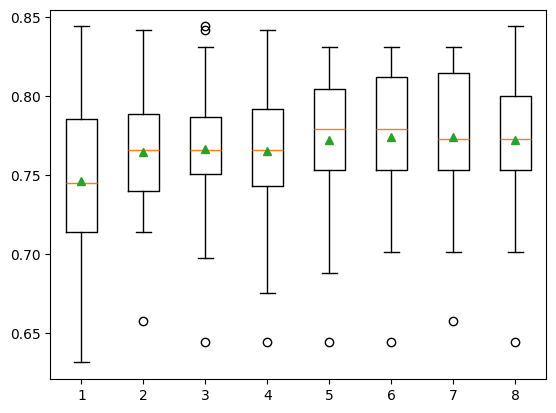

In [34]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

def load_dataset(filename):
    data = read_csv(filename)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
X, y = load_dataset("/kaggle/input\Diabetes Prediction\diabetes.csv")
num_features = [i+1 for i in range(X.shape[1])]
results = list()
for k in num_features:
    trans = StandardScaler()
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('t', trans),('anova',fs), ('lr', model)])
    scores = evaluate_model(pipeline)
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()